In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
# Load the dataset
df = pd.read_csv("market_basket_data.csv")

In [9]:
# Convert data into transaction format
basket = df.pivot_table(index='Transaction_ID', columns='Item', aggfunc=lambda x: 1, fill_value=0)
basket = basket.astype(bool)  # Convert to Boolean

In [12]:
basket

Item,Bread,Butter,Cereal,Cheese,Chicken,Diaper,Eggs,Fish,Fruits,Juice,Milk,Pasta,Rice,Vegetables,Yogurt
Transaction_ID,,,,,,,,,,,,,,,
1,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True
2,False,False,True,True,False,False,True,True,False,False,True,False,False,True,False
3,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False
5,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True
9997,False,False,True,False,True,False,False,False,True,False,False,False,False,True,True
9998,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [16]:
#apply apriori algorithm
frequent_items = apriori(basket,min_support=0.02,use_colnames=True)
frequent_items

,support,itemsets
0,0.2324,(Bread)
1,0.2319,(Butter)
2,0.2405,(Cereal)
3,0.2327,(Cheese)
4,0.2394,(Chicken)
...,...,...
115,0.0548,"(Pasta, Vegetables)"
116,0.0561,"(Yogurt, Pasta)"
117,0.0558,"(Rice, Vegetables)"
118,0.0564,"(Yogurt, Rice)"


In [18]:
#generate Association Rules
rules = association_rules(frequent_items,metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Butter),0.2324,0.2319,0.0585,0.251721,1.085473,1.0,0.004606,1.026489,0.102583,0.144160,0.025805,0.251993
1,(Butter),(Bread),0.2319,0.2324,0.0585,0.252264,1.085473,1.0,0.004606,1.026565,0.102516,0.144160,0.025878,0.251993
2,(Cheese),(Bread),0.2327,0.2324,0.0560,0.240653,1.035513,1.0,0.001921,1.010869,0.044696,0.136886,0.010752,0.240809
3,(Bread),(Cheese),0.2324,0.2327,0.0560,0.240964,1.035513,1.0,0.001921,1.010887,0.044678,0.136886,0.010770,0.240809
4,(Bread),(Chicken),0.2324,0.2394,0.0585,0.251721,1.051467,1.0,0.002863,1.016466,0.063767,0.141544,0.016199,0.248041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,(Vegetables),(Rice),0.2360,0.2317,0.0558,0.236441,1.020460,1.0,0.001119,1.006209,0.026244,0.135470,0.006170,0.238635
144,(Yogurt),(Rice),0.2307,0.2317,0.0564,0.244473,1.055129,1.0,0.002947,1.016907,0.067917,0.138916,0.016625,0.243946
145,(Rice),(Yogurt),0.2317,0.2307,0.0564,0.243418,1.055129,1.0,0.002947,1.016810,0.068005,0.138916,0.016532,0.243946
146,(Yogurt),(Vegetables),0.2307,0.2360,0.0578,0.250542,1.061618,1.0,0.003355,1.019403,0.075447,0.141355,0.019034,0.247729


In [19]:
rules_sorted = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)
print(rules_sorted)

      antecedents   consequents  support  confidence      lift
0         (Bread)      (Butter)   0.0585    0.251721  1.085473
1        (Butter)       (Bread)   0.0585    0.252264  1.085473
68        (Pasta)      (Cheese)   0.0594    0.252229  1.083925
69       (Cheese)       (Pasta)   0.0594    0.255264  1.083925
122      (Fruits)  (Vegetables)   0.0594    0.255704  1.083491
123  (Vegetables)      (Fruits)   0.0594    0.251695  1.083491
137        (Milk)      (Yogurt)   0.0569    0.249233  1.080336
136      (Yogurt)        (Milk)   0.0569    0.246641  1.080336
94         (Rice)      (Diaper)   0.0589    0.254208  1.079898
95       (Diaper)        (Rice)   0.0589    0.250212  1.079898


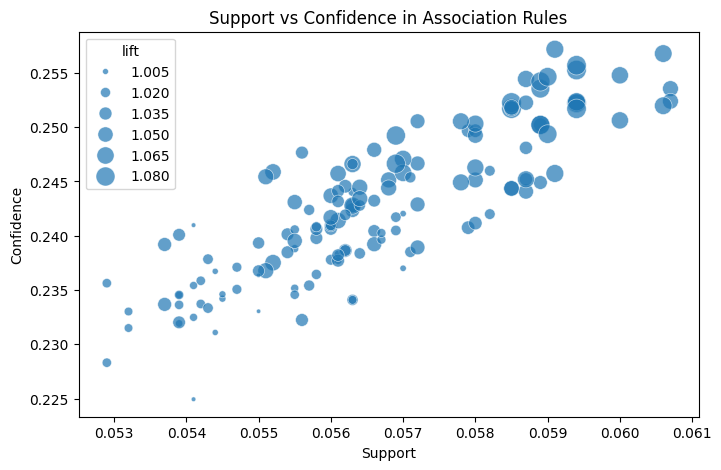

In [22]:

# Scatter plot of Support vs Confidence
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=rules['support'], y=rules['confidence'], size=rules['lift'], sizes=(10, 200), alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence in Association Rules")
plt.show()

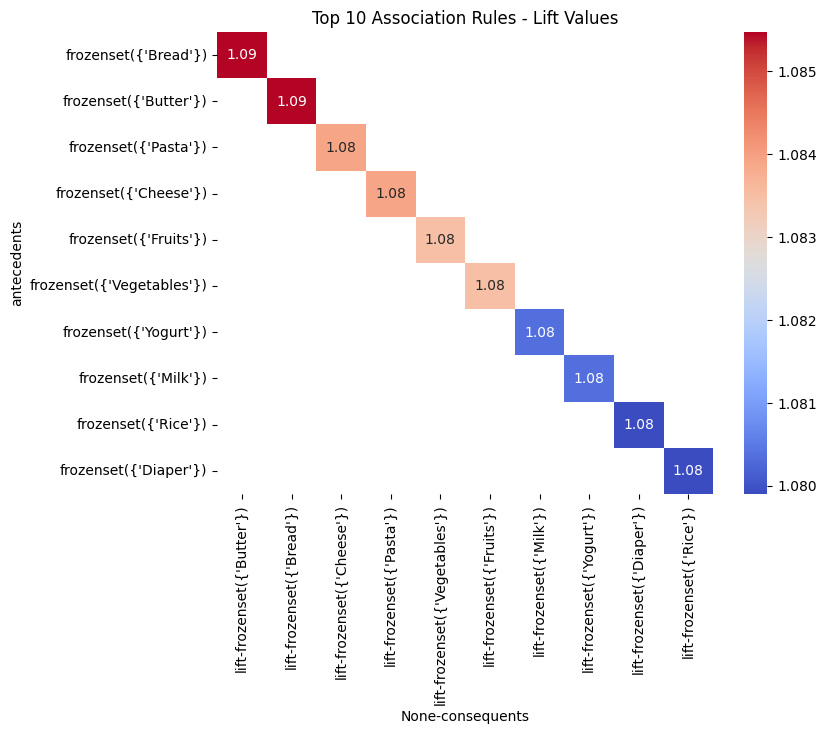

In [23]:
# Heatmap for Top 10 Rules (Lift Values)
top_rules = rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'lift']]
top_rules = top_rules.set_index(['antecedents', 'consequents']).unstack()
plt.figure(figsize=(8,6))
sns.heatmap(top_rules, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Association Rules - Lift Values")
plt.show()